In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
%matplotlib inline

In [4]:
df = pd.read_csv('Algerian_forest_fires_cleaned_dataset.csv')

In [6]:
df.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [8]:
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [9]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [10]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [11]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [12]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [19]:
df['Classes'].str.contains('not fire').sum()

106

In [20]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0, 1)

In [22]:
df.tail(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
242,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [23]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [24]:
## Independent And dependent features
x=df.drop('FWI',axis=1)
y=df['FWI']

In [25]:
pf = ProfileReport(df)

In [27]:
pf.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [28]:
pf.to_file('Algerian_forest.html')

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y , test_size=0.25, random_state=42)

In [42]:
#x_train.corr()

<AxesSubplot:>

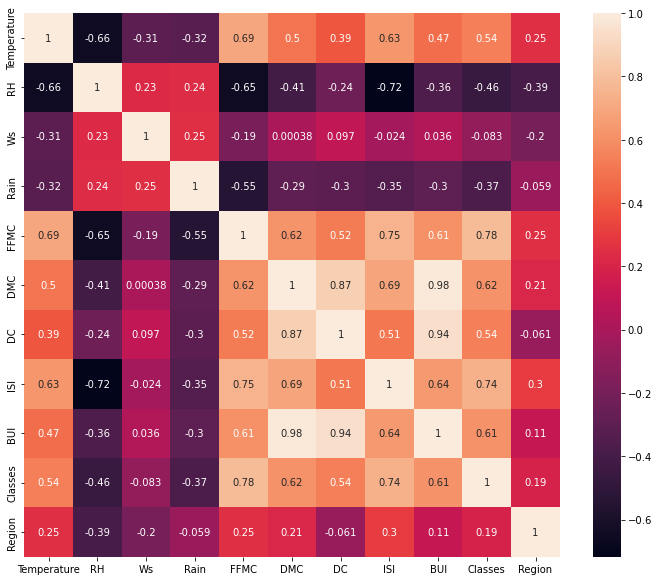

In [31]:
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr, annot=True)

In [32]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [33]:
x.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'Classes', 'Region'],
      dtype='object')

In [35]:
x_train.shape[1]

11

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_df = pd.DataFrame()
vif_df['feature']= x.columns
vif_df['vif']= [ variance_inflation_factor(x_train,i) for i in range(x_train.shape[1])]

In [37]:
vif_df

,feature,vif
0,Temperature,2.477908
1,RH,3.229752
2,Ws,1.378782
3,Rain,1.652729
4,FFMC,5.293971
5,DMC,329.430745
6,DC,91.919106
7,ISI,5.129975
8,BUI,698.133175
9,Classes,3.572960


In [38]:
df1 = df1 = pd.DataFrame(x_train)

In [41]:
#df1.profile_report()

In [43]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
lr.score(x_train,y_train)

0.9723553091099947

In [47]:
lr.intercept_

7.156043956043958

In [48]:
lr.coef_

array([-6.08742794e-02, -1.76019852e-01, -6.93227982e-02,  5.87019808e-04,
       -8.83497419e-01,  3.18981916e-03, -6.48363381e-01,  5.04033269e+00,
        4.27031281e+00,  3.01209673e-01, -1.69104994e-01])

In [50]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

In [44]:
lr.score(x_test,y_test)

0.9893850294922101

In [45]:
import pickle
pickle.dump(lr, open('Algerian_forest.pickle', 'wb'))

In [46]:
model= pickle.load(open('Algerian_forest.pickle', 'rb'))

In [51]:
#model.predict(x_test)

array([ 8.31996412e+00,  7.45235640e+00, -8.27841406e-02,  5.16297204e+00,
        6.54064195e+00,  1.44543845e+00,  2.26547638e+00,  7.46300597e+00,
        1.92399106e+00,  3.18524625e+00,  7.39775428e-02,  5.94281376e+00,
        9.48344115e+00,  1.63845627e+01,  1.91363707e+01,  1.31652130e+00,
        2.08631652e+00, -2.96788725e-03,  6.76169290e+00,  3.14670707e+00,
        1.27353235e+00,  1.86197099e-01,  6.42186652e+00,  9.35012627e-02,
        2.10746623e+01,  5.00923944e+00,  5.87895763e+00,  9.98883439e+00,
        1.27612791e-01,  9.65513073e+00,  6.35241685e+00, -1.60871489e-01,
        1.02650479e+01,  1.50897365e+01,  1.29812593e+00,  6.24859348e-01,
        1.82949587e+00,  6.12102707e+00, -2.80701367e-01, -4.94849429e-01,
        7.03055056e+00,  1.57271366e+00,  8.45730189e+00, -3.51626222e-01,
        1.51365466e+01,  7.87828752e+00,  7.72962790e+00,  1.07804026e+00,
        1.24569975e+01,  8.41526407e-01,  2.85899477e+01,  5.43283120e+00,
        1.71859071e+01,  

In [55]:
y_pred = lr.predict(x_test)

In [56]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.9893850294922101

In [57]:
def adj_r2(x,y):
    r2 = lr.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [58]:
adj_r2(x_test,y_test)

0.9870020769292368

Mean absolute error 0.4654460800094092


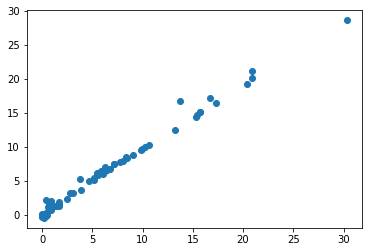

In [59]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
plt.scatter(y_test,y_pred)

Mean absolute error 1.0816323165898805
R2 Score 0.9548117077009715


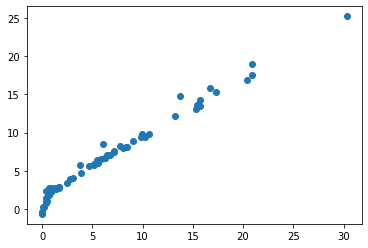

In [61]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train,y_train)
y_pred=lasso.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5032856973416847
R2 Score 0.9871729594175265


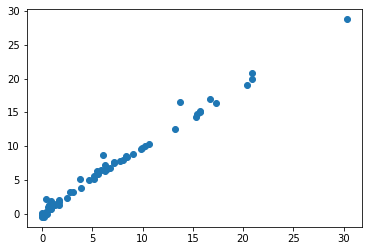

In [62]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train,y_train)
y_pred=ridge.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

Mean absolute error 0.5053525521628108
R2 Score 0.9873482065539131


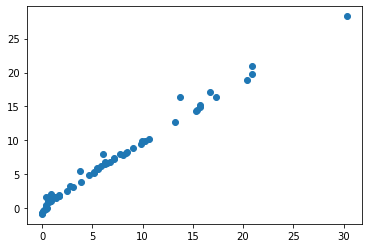

In [68]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(x_train,y_train)
y_pred=lassocv.predict(x_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5032856973416847
R2 Score 0.9871729594175265


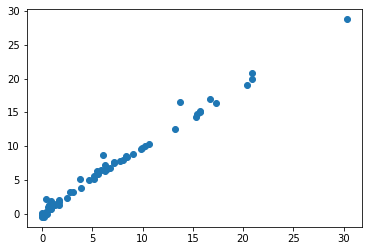

In [67]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train,y_train)
y_pred=ridgecv.predict(x_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 0.5891683480603581
R2 Score 0.9833493614806597


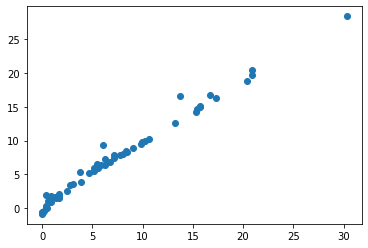

In [64]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(x_train,y_train)
y_pred=elasticcv.predict(x_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

Mean absolute error 1.6830954467418584
R2 Score 0.900671789556956


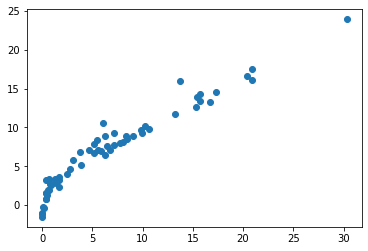

In [65]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elastic=ElasticNet()
elastic.fit(x_train,y_train)
y_pred=elastic.predict(x_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)